In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

: 

In [ ]:
df = pd.read_csv('Housing.csv')

: 

In [ ]:
df

In [16]:
df.shape

(545, 13)

In [17]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [18]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [19]:
df.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

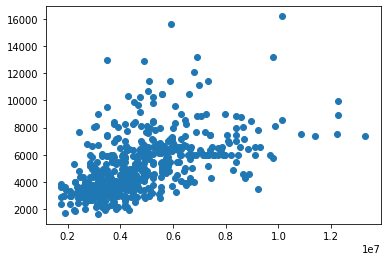

In [20]:
plt.scatter(df.price,df.area)

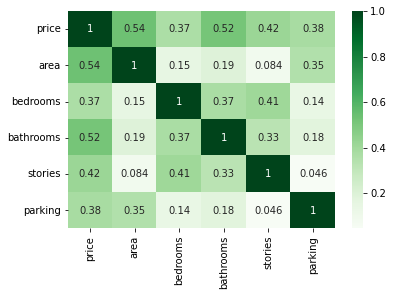

In [21]:
sns.heatmap(df.corr(), annot=True, cmap='Greens')

In [22]:
X= df[['area','bedrooms','bathrooms','stories','parking']]
y= df.price

In [23]:
X.ndim

2

In [24]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)

In [25]:
X_test.shape


(109, 5)

In [26]:
model = LinearRegression()

In [27]:
model.fit(X_train,y_train)

LinearRegression()

In [28]:
y_predict = model.predict(X_test)

In [29]:
r2_score(y_test,y_predict)

0.5300823732927185

In [30]:
model.intercept_

-121143.9445989281

In [31]:
model.coef_

array([3.23689740e+02, 1.51580843e+05, 1.08747628e+06, 5.84975767e+05,
       4.69540159e+05])

In [32]:
y_predict = model.predict(X_test)

In [33]:
r2_score(y_test,y_predict)

0.5300823732927185

In [35]:
model.predict([[1650 ,2,1,1,1]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([2858098.01507154])

In [36]:
import pickle
with open('model.pkl','wb') as files:
  pickle.dump(model,files)